In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

from IPython.display import HTML

In [4]:
# importation des données brutes en utilisant les productid comme index

data_path = "../data/raw/"
df = pd.read_csv(data_path+"X_train_update.csv", index_col="productid").drop("Unnamed: 0", axis=1)
y = pd.read_csv(data_path+"Y_train_CVw08PX.csv")['prdtypecode']
y.index = df.index

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/X_train_update.csv'

In [ ]:
# on créer une colonne avec le chemin de l'image correspondante

im_folder_path = data_path+"images/image_train/"
# les noms de fichier image sont de la forme image_imageid_product_productid.jpg
df['image'] = im_folder_path + 'image_' + df['imageid'].astype('str') + '_product_' + df.index.astype('str') +'.jpg'
# plus nécessaire de garder imageid qui est renseigné dans le chemin
df.drop('imageid', axis=1, inplace=True)

In [ ]:
# fonction qui permet d'afficher les images du dataframe à partir du chemin des images
# et également les descriptions complètent
# attention de ne pas utiliser max_length trop grand sinon ça va être long à charger

def display_df(df, max_length = 100):
    formatters={
        "image": lambda path: f'<img src="{path}" width="400">',
    }
    display(HTML(df.head(max_length).to_html(escape=False, formatters=formatters)))

In [ ]:
y.value_counts()[:5]

In [ ]:
# exemple; on affiche les 5 premières entrées de la catégorie 2583

cat = 1301
display_df(df[y == cat], 5)

### Tester l'impact de variable indicatrice sur la présence ou non de certains mots

In [ ]:
def confusion_matrix(list_of_words, categorie, include_description=True, normalize=False):
    texts = df['designation']          # Series contenant les textes
    if include_description:
        texts += ' - '+df['description'].fillna('')
    contains_list_of_words = np.where(texts.str.lower().str.contains('|'.join(list_of_words)), 1, 0)
    is_in_cat = np.where(y==categorie, 1, 0)
    score = f1_score(is_in_cat, contains_list_of_words)
    cm1 = pd.crosstab(
        is_in_cat,
        contains_list_of_words, rownames=['categorie '+str(categorie)], colnames=['contient un des mots'], normalize=normalize
    )
    cmall = pd.crosstab(y, contains_list_of_words, rownames=['categorie'], colnames=['contient un des mots'], normalize=normalize)
    return cm1, cmall, score

In [ ]:
# on voit sur les descriptions de la catégorie 2583 affichés plus haut qu'il y a des pompes, supresseurs, testeurs
# on peut test si il apparaissent dans beaucoup de description de la catégorie 2583 avec les matrice de confusion

cm1, cmall, score = confusion_matrix(["pompe", "supresseur", "testeur"], 2583)
display(cm1)
display(cmall)
print(f"f1 score : {score}")

In [70]:
# les données sans les doublons et avec les étiquettes pour les langues, les doublons proches et les mauvais étiquetage potentiels
df= pd.read_csv('exploration.csv')
df.head()  

,productid,prdtypecode,designation,description,image,cleaned_designation,cleaned_description,text,hashed_image,category,group,cleaned_description_len,is_label_issue,detected_lang,near_duplicated
0,3804725264,10,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,../data/raw/images/image_train/image_126359704...,olivia: personalisiertes notizbuch 150 seiten ...,NaN,olivia: personalisiertes notizbuch 150 seiten ...,fbde1b7de24a0a658aa7fb4d5acd2d77f2cefe1f,Livres spécialisés,Livres & Revues,0,False,it,False
1,436067568,2280,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,../data/raw/images/image_train/image_100814123...,journal des arts (le) n° 133 du 28/09/2001 l'a...,NaN,journal des arts (le) n° 133 du 28/09/2001 l'a...,3b89f1c531ac374c59083a79887408e1145d5003,Presse & Magazines,Livres & Revues,0,False,fr,False
2,201115110,50,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,../data/raw/images/image_train/image_938777978...,grand stylet ergonomique bleu gamepad nintendo...,pilot style touch pen de marque speedlink est ...,grand stylet ergonomique bleu gamepad nintendo...,6baca87dec4eade08a824edf99a300a64b8dd2e8,Accessoires & Périphériques,Jeux Vidéo,669,False,fr,False
3,50418756,1280,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,../data/raw/images/image_train/image_457047496...,peluche donald europe disneyland 2000 (marionn...,NaN,peluche donald europe disneyland 2000 (marionn...,90c1b55c7b8d63471a0a7285c27872233c68a2f7,Jouets & Figurines,"Jouets, Jeux & Loisirs",0,False,fr,False
4,278535884,2705,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,../data/raw/images/image_train/image_107775778...,la guerre des tuques,luc a des idées de grandeur il veut organiser ...,la guerre des tuques luc a des idées de grande...,d3e249eb5011173e3a8ca5d478df9172c7390cf6,Littérature,Livres & Revues,182,False,fr,False


In [71]:
df[df.detected_lang == "fr"]
df= df[df.detected_lang == "fr"]

In [481]:
import pandas as pd
import numpy as np

# 1. Definir les mots clés par catégorie

keyword_dict = {
    "Animaux": [ "chien", "chat", "animal", "compagnie", "collier"],
    "Bureau & Papeterie": ["verso", "cahier", "encre", "papier", "recto", "a5"],
    "Épicerie": ["epices", "arôme", "chocolat", "sucre", "sachet", "capsule"],
    "Puériculture": ["langer", "bavoir", "assiette", "siege", "tétine", "poussette"],
    "Vêtement Bébé & Loisirs": ["bébé", "chaussettes", "paire", "longueur", "filles","garçons"],
    "Figurines": ["figurine", "gundam", "statuette", "officiel", "marvel", "funko"],
    "Jeux de cartes":["mtg", "oh", "rare", "vf", "carte", "magic"],
    "Jeux de rôle & Figurines": ["halloween", "figurine", "warhammer", "prince", "masque"],
    "Bricolage & Outillage": ["arrosage", "tondeuse", "aspirateur", "appareils", "outil", "coupe", "bâche"],
    "Décoration & Équipement Jardin": ["bois", "jardin", "résistant", "tente", "parasol", "aluminium"],
    "Piscine & Accessoires": ["piscine", "filtration", "pompe", "dimensions","eau", "ronde"],
    "Accessoires & Périphériques":["nintendo", "manette", "protection", "ps4", "silicone", "câble"],
    "Consoles": ["console", "oui", "jeu", "écran", "portable", "marque", "jeux"],
    "Jeux PC en Téléchargement":["windows", "jeu", "directx", "plus", "téléchargement", "disque", "édition"],
    "Jeux Vidéo Modernes": ["duty","jeux", "manettes", "ps3", "xbox", "kinect"],
    "Rétro Gaming": ["japonais", "import", "langue", "titres", "sous", "français"],
    "Jeux éducatifs": ["joue", "cartes", "enfants", "éducatif", "bois", "jouer"],
    "Jouets & Figurines": ["doudou", "enfants", "cadeau", "peluche", "jouet", "puzzle"],
    "Loisirs & Plein air": ["camping", "pêche", "stress", "stream", "bracelet", "trampoline"],
    "Modélisme & Drones": ["drone", "générique", "dji", "avion", "batterie", "cámera", "one"],
    "Littérature": ["monde", "ouvrage", "siècle", "roman", "livre", "histoire", "tome"],
    "Livres spécialisés": ["guide", "édition", "histoire", "art", "collection"],
    "Presse & Magazines": ["journal", "france", "illustre", "magazine", "presse", "revue"],
    "Séries & Encyclopédies":[ "lot", "livres", "tomes", "volumes", "tome", "revues"],
    "Décoration & Lumières": ["led", "noël", "lumière", "lampe", "décoration", "couleur"],
    "Textiles d'intérieur": ["oreiller", "taie", "coussin", "couverture", "canapé", "cotton"],
     "Équipement Maison":["matelas", "assise", "bois", "table", "hauteur", "mousse"]
    
}

# Construire un texte global
df["text"] = (df["cleaned_designation"].fillna("") + " " +
              df["cleaned_description"].fillna("")).str.lower()

# Génération des colonnes de comptage

data = {}

for cat, mots in keyword_dict.items():
    pattern = '|'.join(mots)  # expression régulière
    data[cat + "_keywords"] = df["text"].str.count(pattern)

# Convertir en DataFrame final
new_X = pd.DataFrame(data)
new_X

,Animaux_keywords,Bureau & Papeterie_keywords,Épicerie_keywords,Puériculture_keywords,Vêtement Bébé & Loisirs_keywords,Figurines_keywords,Jeux de cartes_keywords,Jeux de rôle & Figurines_keywords,Bricolage & Outillage_keywords,Décoration & Équipement Jardin_keywords,...,Jouets & Figurines_keywords,Loisirs & Plein air_keywords,Modélisme & Drones_keywords,Littérature_keywords,Livres spécialisés_keywords,Presse & Magazines_keywords,Séries & Encyclopédies_keywords,Décoration & Lumières_keywords,Textiles d'intérieur_keywords,Équipement Maison_keywords
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84540,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
84542,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,2
84543,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,2,1,0,0,0,0
84544,0,0,0,0,0,0,0,0,0,12,...,0,0,0,1,2,0,0,2,0,19


In [482]:
# keywords / catégorie
total_keywords_per_category = new_X.sum().sort_values(ascending = False)
total_keywords_per_category



Piscine & Accessoires_keywords             125489
Décoration & Lumières_keywords              72366
Équipement Maison_keywords                  52763
Jeux PC en Téléchargement_keywords          46784
Consoles_keywords                           46186
Livres spécialisés_keywords                 45817
Textiles d'intérieur_keywords               43611
Jeux éducatifs_keywords                     40693
Modélisme & Drones_keywords                 35016
Jouets & Figurines_keywords                 34055
Décoration & Équipement Jardin_keywords     28855
Vêtement Bébé & Loisirs_keywords            20997
Accessoires & Périphériques_keywords        17377
Bricolage & Outillage_keywords              16973
Séries & Encyclopédies_keywords             12071
Rétro Gaming_keywords                       10967
Littérature_keywords                        10362
Bureau & Papeterie_keywords                  9648
Jeux de cartes_keywords                      9349
Loisirs & Plein air_keywords                 9324


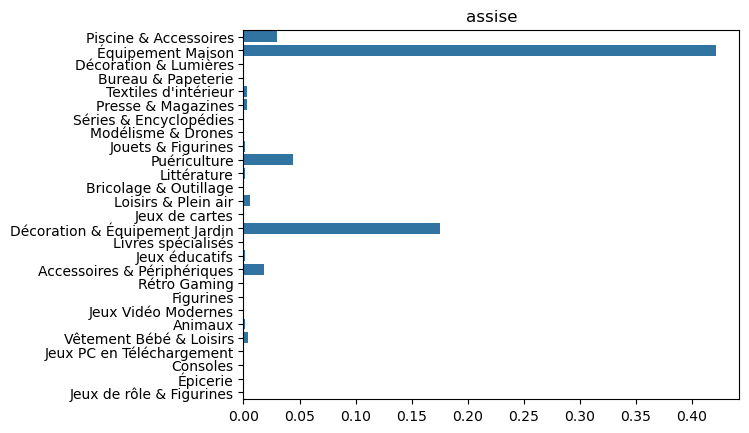

In [483]:
import matplotlib.pyplot as plt
import seaborn as sns
y = df['category']
for keyword in [  "assise"]:
    count_kw = df["text"].str.lower().str.count(keyword)
    cat_counts = y.value_counts()
    freq = {}
    for cat, count in cat_counts.items():
        freq[cat] = count_kw[y==cat].sum() / count
    sns.barplot(y=freq.keys(), x=freq.values(), orient='h')
    plt.title(keyword)
    plt.show()

 #   "Textiles d'intérieur": ["oreiller", "taie", "coussin", "couverture", "canapé", "cotton"] "Équipement Maison":







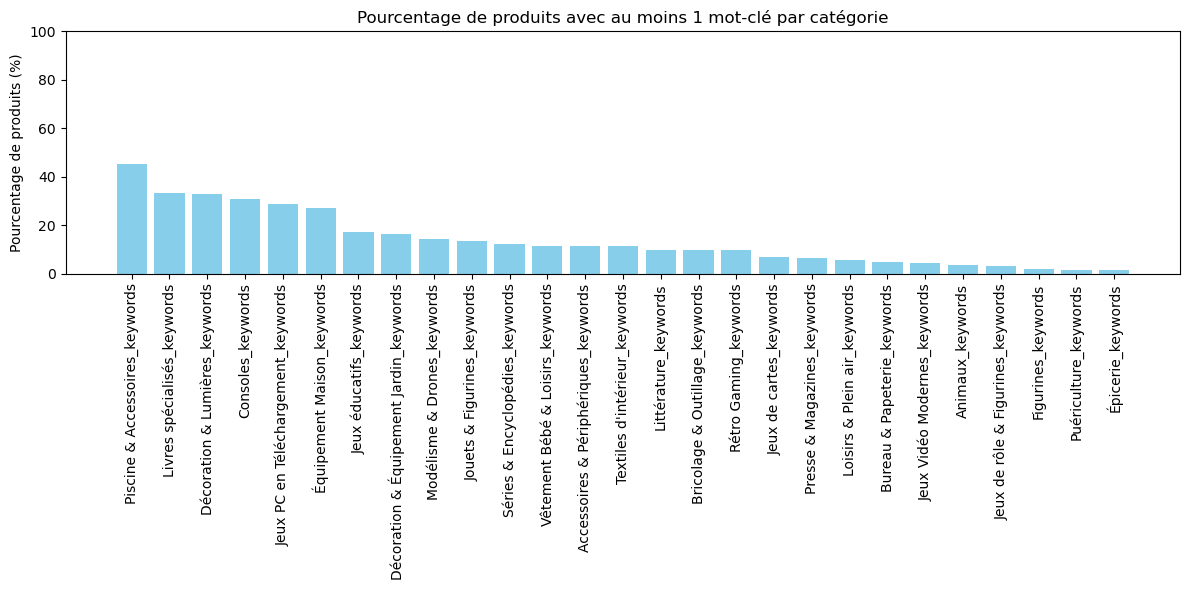

In [484]:


# Créer un DataFrame booléen : True si au moins 1 mot-clé
has_keyword = new_X >= 1

# Calculer le pourcentage de produits avec ≥1 mot-clé par catégorie
percentage_per_category = has_keyword.sum() / len(new_X) * 100

# Trier de manière décroissante
percentage_per_category = percentage_per_category.sort_values(ascending=False)

# Graphique en barres
plt.figure(figsize=(12, 6))
plt.bar(percentage_per_category.index, percentage_per_category.values, color='skyblue')
plt.xticks(rotation=90)  
plt.ylabel("Pourcentage de produits (%)")
plt.title("Pourcentage de produits avec au moins 1 mot-clé par catégorie")
plt.ylim(0, 100)  
plt.tight_layout()
plt.show()



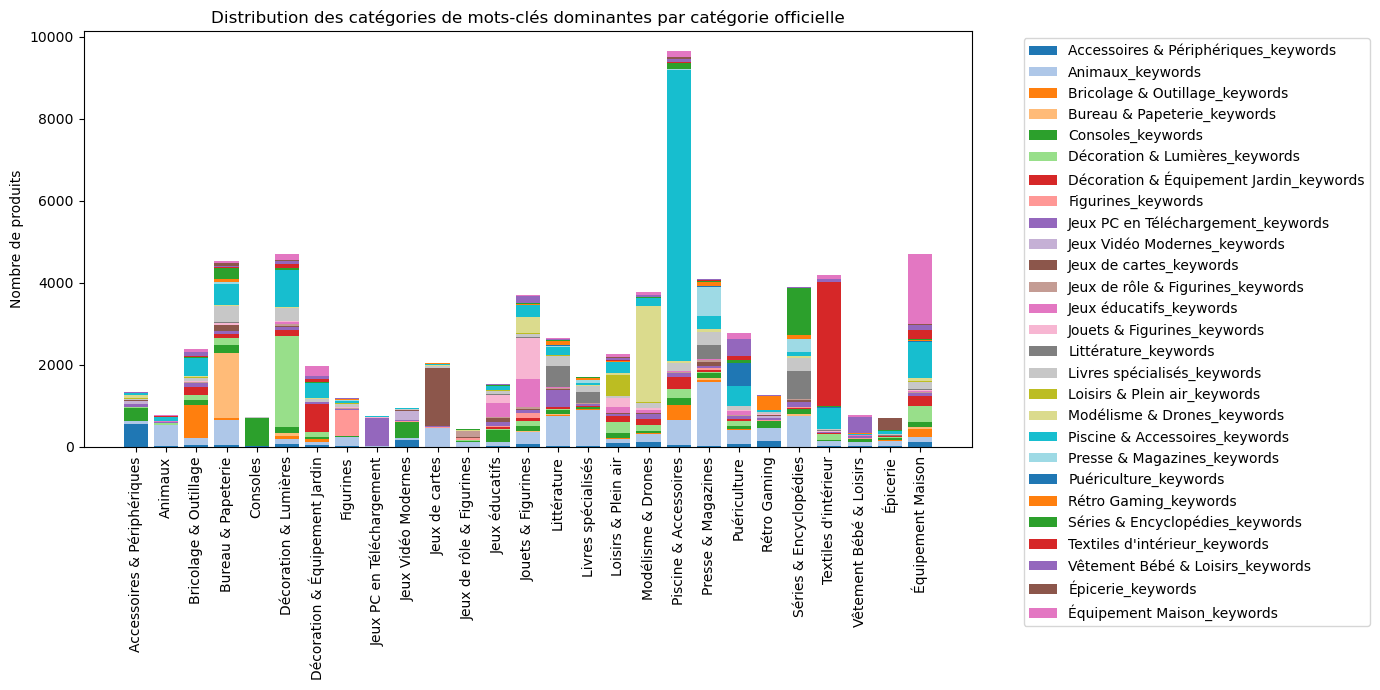

In [485]:

# Catégorie dominante de mots-clés par produit
categorie_motcle_dominante = new_X.idxmax(axis=1)

# Tableau croisé : lignes = catégorie officielle, colonnes = catégorie dominante de mots-clés
distribution = pd.crosstab(df['category'], categorie_motcle_dominante)

# --- Palette de 27 couleurs bien distinctes ---
from itertools import chain
import matplotlib.pyplot as plt

# Combinaison de palettes très contrastées
palette1 = plt.cm.tab20.colors          # 20 couleurs
palette2 = plt.cm.tab10.colors          # 10 couleurs
palette = list(chain(palette1, palette2))[:27]  # 27 couleurs bien différentes

# --- Graphique en barres empilées ---
fig, ax = plt.subplots(figsize=(14, 7))

bottom = np.zeros(len(distribution))
categories_officielles = distribution.index

for i, kw_cat in enumerate(distribution.columns):
    ax.bar(
        categories_officielles,
        distribution[kw_cat],
        bottom=bottom,
        label=kw_cat,
        color=palette[i]  # couleurs distinctes
    )
    bottom += distribution[kw_cat].values

ax.set_ylabel("Nombre de produits")
ax.set_title("Distribution des catégories de mots-clés dominantes par catégorie officielle")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
